# Modeling Overview

Predictive modeling: <br>
* target variable categorical: classification <br>
* target variable continuous/real-valued: regression <br>
(predictor variables need to be converted for some modeling

Supervised vs. unsupervised

Parametric vs. nonparametric models: <br>
* parametric looks for underlying distribution<br>
imposes structure on data <br>
classical statistical methods: MOM, MLE <br>
* nonparametric is data driven <br>
does not impose structure on data <br>
statistical method: MAP <br>

Parametric models: <br>
* regression: linear regression <br>
* classification: logistic regression

Nonparametric models: <br>
* regression and classification: kNN <br>
* regression and classification: decision trees <br>

# Overfitting vs. Underfitting

Bias: underfitted, does not capture underlying signal <br>
Variance: overfitted, captures underlying signal plus noise <br>
bias variance trade-off <br>
high bias: add more features <br>
high variance: remove features or get more data <br>
more variables: leads to overfitting <br>

In [ ]:
# INSERT SLIDES

# Cross Validation

Metrics are in-sample metrics: applied to the same data that was used to fit the model <br>
main idea: set aside some of your data for testing <br>
steps: <br>
(1) split data <br>
(2) use training set to train several models <br>
(3) evaluate each model using the test set <br>
k-fold cross validation <br>
leave one out cross validation <br>

In [17]:
# ADD CODE !!!!
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Evaluation and Metrics

depends on whether regression or classification <br>
??? depends on mathematical approach used inside model (e.g. running linear regression with ordinary least? RSS.   

## Feature Engineering / Dimensionality Reduction

# Linear Regression Flowchart

In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/andreafabry/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Get Data

In [ ]:
# Get credit card data
balance = pd.read_csv('data/balance.csv', index_col=0)
balance.head()

# Clean Data

### Categorical Variables

binary: convert them to numerical 0, 1 <br>
multiple categories: create p-1 number dummy variables, if too many, consolidate(other approaches: deviation coding/sum contrasts compares against mean) <br>
ordered: convert to ordered numerical, works best with LR <br>
(other approach: polynomial coding) <br>
R, G, Y categories <br>
baseline: R   y^ = B[o] + B[1]G + B[2]Y <br>
                   10      20      -35 <br>
baseline: G   y^ = B[o] + B[1]R + B[2]Y <br>
                    30      -20     -55 <br>
                           G-B      G-Y <br>
relationship same, but adjusted baseline will yield different coefficients

In [4]:
# Clean data - convert categorical to codes

# Married - 1, Not Married - 0
balance['Married'] = balance['Married'].map({'Yes': 1, 'No': 0})
# Female - 0, Male - 1
balance['Gender'] = balance['Gender'].map({'Female': 0, ' Male': 1})
# Student Yes - 1, Student No - 0
balance['Student'] = balance['Student'].map({'Yes': 1, 'No': 0})

# Get the Dummy variables
ethnicity_dummy = pd.get_dummies(balance['Ethnicity'])
# Only need two of the three values
balance[['Asian', 'Caucasian']] = ethnicity_dummy[ ['Asian', 'Caucasian'] ]
# Remove the Ethnicity column (adding the pth column will cause multicollinearity)
# vs. one hot encoding used in tree models and nearest neighbors
del balance['Ethnicity']

balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0,1
2,106.025,6645,483,3,82,15,0,1,1,903,1,0
3,104.593,7075,514,4,71,11,1,0,0,580,1,0
4,148.924,9504,681,3,36,11,0,0,0,964,1,0
5,55.882,4897,357,2,68,16,1,0,1,331,0,1


# EDA

Text(0.5,1,'Age vs. Balance')

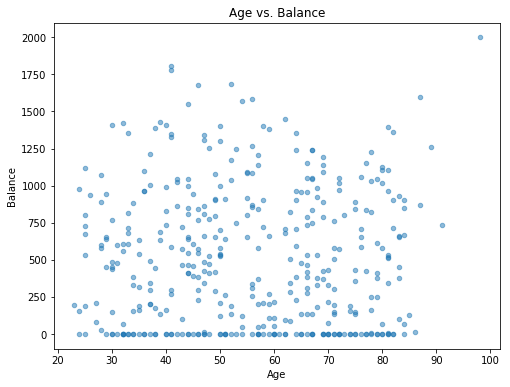

In [5]:
# Plot age vs. balance as one pair of variables
fig = plt.figure(figsize=(8, 6))
fig.clf()
ax = fig.gca()
balance.plot(kind = 'scatter', x = 'Age', y = 'Balance', ax = ax, alpha = 0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_title('Age vs. Balance')

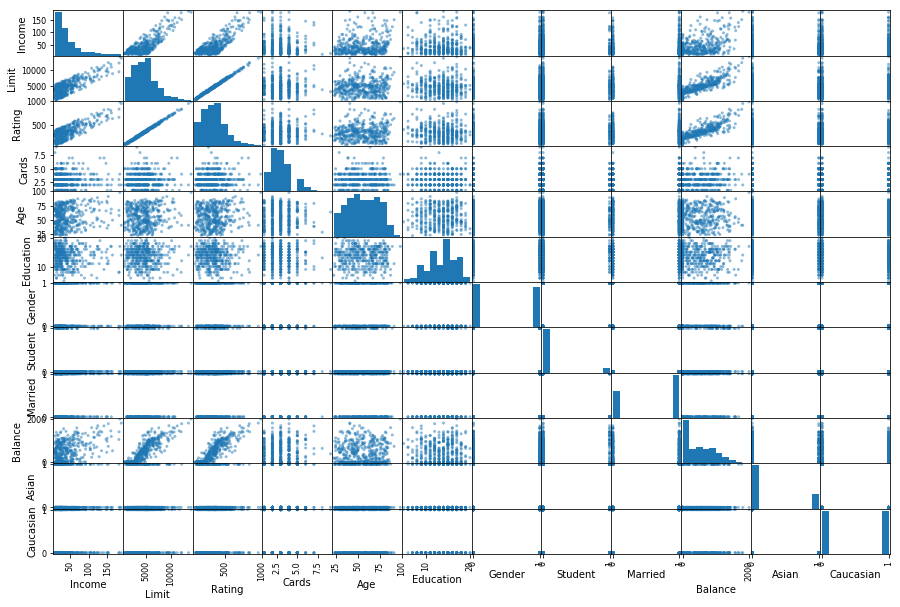

In [6]:
# plot all combinations
pd.plotting.scatter_matrix(balance, figsize=(15, 10))
plt.show()

# Fit Using Ordinary Least Regression

### Linear Regression Equation explained <br>
Y: Y variable, dependent variable, target, outcome, what I'm trying to predict <br>
Xs: X variables, independent variables, features, attributes, what I'm using to predict Y <br>
Capital Greek B[o]: intercept, baseline, where the predicted value of X=0 <br>
Capital Greek B[1...n]: slope/regression coefficients, the degree by which each <br>
X variable goes up/down for 1 value of X holding everything else constant <br>
Greek e: error term/residuals, difference between predictions and true y values <br>

In [7]:
# Do linear regression using Statsmodel
# Choose the predictor(s) and add a constant term
# (allow for an intercept)
X = balance[['Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Asian', 'Caucasian']] 
# determine X variable
X = sm.add_constant(X)  # We need to manually add a constant, aka intercept, when working with statsmodels
y = balance['Balance'] # determine Y variable

# create a linear regression object
balance_model = sm.OLS(y, X)
balance_results = balance_model.fit()

In [ ]:
# ADD CODE !!!!
# Do linear regression using Sklearn

In [3]:
# ADD CODE !!!!
# Predict test case
# record: row, case, instance, example
# vector of predictor and outcome values
# Use prediction to evaluate model

# Evaluate

## Overall Metrics

Root Mean Squared Error/RSS: sum of y[i] - y-hat[i] squared <br>
(difference between true value of y and predicted value of y) <br>
by n, then take the square root <br>
<br>
Residual Standard Error: same as RMSE/RSS adjusted for degrees of freedom, <br>
aka instead of divided by n, divided n-p-1, then take square root <br>
<br>
R Squared: coefficient of determination, proportion of variance explained by <br>
model, independent of scale of Y sum of y[i] - y-hat[i] squared <br>
(distance between true y values and predicted y values), <br>
divided by sum of y[i] - y-topline[i] squared <br>
(how far each y value is away from the mean of y) <br>
<br>
RSS: residuals sums squared / TSS: total sum squared <br>

In [ ]:
balance_results.summary()

## Metrics Continued: Full Model vs. Submodel

F-test compares model with some predictors (submodel/reduced model) <br>
to a full model <br>
default=drops all predictors and compares null model to full model <br>
(not very helpful) <br>
large F-statistic/low p-value means the dropped parameters are important <br>

T-test evaluates one variable (F-test for one variable) <br>
t-statistic: significance of each coefficients <br>
aka outside the range of what random chance may produce <br>
large t-statistics/low p-value means the X variable is more important <br>

## High Bias: Confounding Variable, Nonlinear Relationship

### Confounding Variables

In [2]:
# important variable missing

### Nonlinear Relationships

In [ ]:
# plot partial residuals plot (for one variable)
# fix: many methods, inserting interaction features, or
# do polynomial or spline regression

## High Variance: Outliers with High Leverage, Heterodescacity, Multicollinearity

## Plot Residuals

Studentized residuals: errors standardized against real variance <br>
(mean squared error times 1-diagonal elements of the y^ matrix) <br>
shows the number of standard deviations away we are from the regression line <br>
<br>
Detect: non-linear relationships, outliers, heteroscedasticity <br>

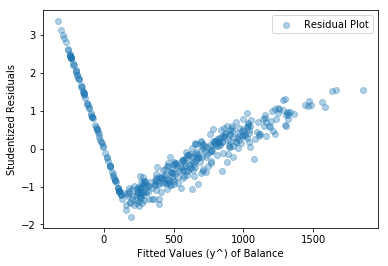

In [24]:
# Plot studentized residuals
balance_results = sm.OLS(y, X).fit()
student_resids = balance_results.outlier_test()['student_resid']
y_hats = balance_results.predict(X)

plt.scatter(y_hats, student_resids, alpha = .35, label='Residual Plot')
plt.legend()
plt.xlabel('Fitted Values (y^) of Balance')
plt.ylabel('Studentized Residuals')
plt.show()

### Outliers and Leverage

In [ ]:
# outliers vs. high leverage points <br>
# high leverage points influence the regression line
# outliers are not an issue in big data problems, except for anomaly detection
# outliers with high leverage are a problem
# fix: check if it is bad data? compare regression line w/ or w/o influential point

# Plot using Cook's distance to see outliers with high leverage
# combines standardized residuals, hat-value and cook's distance
# cook's distance combines leverage and residual size
# size of the bubble shows the value of cook's distance metrics

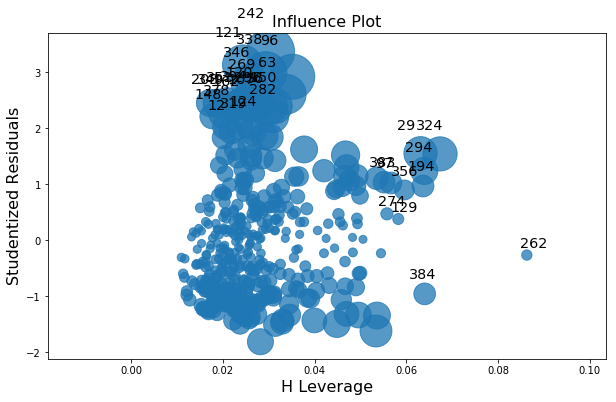

In [25]:
# Plot influence plot with Cook's distance
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(balance_results, ax=ax, criterion="cooks")

### Heteroscedasticity

for formal inference to be valid, residuals have to <br>
* be normally distributed and have the same variance (if not, heteroscedasticity) <br>
* be independent (if not, autocollinearity) <br>

heteroskedasticity: errors are greater for some portion of the range <br>
plot errors against normal distribution <br>
fix: transformation of Y <br>

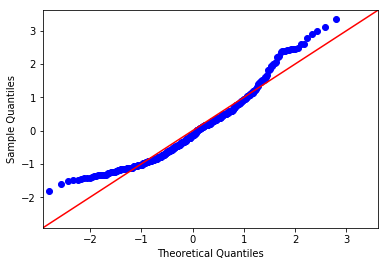

In [27]:
# plot QQ plot
sm.graphics.qqplot(student_resids, line='45', fit=True)
plt.show()

more features, more likely to overfit <br>
fix: use penalized regression <br>
* LASSO <br>
* ridge

## Multicollinearity

redundancy among predictors <br>
caused by too many variables <br>
or interaction between two X variables (correlated variables) <br>
fix: remove variables, use penalized regression, or create interaction features that capture the interaction of the two variables

In [ ]:
# ADD CODE !!!
# Penalized Regression
# LASSO
# Ridge

## Interaction Features

to find interactions: <br>
* subset regression: F-test for each submodel (time-consuming/computationally expensive) <br>
* use domain knowledge <br>
* use stepwise regression <br>
* use penalized regression (lasso or ridge) <br>
* use tree models/random forest, gradient boosted trees <br>